<a href="https://colab.research.google.com/github/muskanalirizvi/-Internboot/blob/main/Task1_BEGINNER_LEVEL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Files in the Kaggle Dataset**

**2. Setup — Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**3. Load All Files**

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
stores = pd.read_csv("stores.csv")
oil = pd.read_csv("oil.csv")
holidays = pd.read_csv("holidays_events.csv")
transactions = pd.read_csv("transactions.csv")


**4. Basic Cleaning**

In [ ]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
train.shape

(3000888, 6)

In [ ]:
test.shape

(28512, 5)

In [ ]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [ ]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
#Convert dates to datetime

train['date'] = pd.to_datetime(train['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays['date'] = pd.to_datetime(holidays['date'])
transactions['date'] = pd.to_datetime(transactions['date'])


In [ ]:
#Check for missing values
train.isnull().sum()

,0
id,0
date,0
store_nbr,0
family,0
sales,0
onpromotion,0


In [ ]:
oil.isnull().sum()


,0
date,0
dcoilwtico,43


In [ ]:
test.isnull().sum()


,0
id,0
date,0
store_nbr,0
family,0
onpromotion,0


In [ ]:
stores.isnull().sum()


,0
store_nbr,0
city,0
state,0
type,0
cluster,0


In [ ]:
holidays.isnull().sum()


,0
date,0
type,0
locale,0
locale_name,0
description,0
transferred,0


In [ ]:
transactions.isnull().sum()


,0
date,0
store_nbr,0
transactions,0


In [ ]:
#Use interpolation to fill gaps.

oil['dcoilwtico'] = oil['dcoilwtico'].interpolate()


In [ ]:
train.duplicated().sum()


np.int64(0)

In [ ]:
test.duplicated().sum()


np.int64(0)

In [ ]:
stores.duplicated().sum()


np.int64(0)

In [ ]:
oil.duplicated().sum()


np.int64(0)

In [ ]:
holidays.duplicated().sum()


np.int64(0)

In [ ]:
transactions.duplicated().sum()


np.int64(0)

**5. Merge Relevant Data for EDA**

In [ ]:
sales_store = train.merge(stores, on='store_nbr', how='left')
sales_store_oil = sales_store.merge(oil, on='date', how='left')


**6. Feature Engineering for Trends & Seasonality**

In [ ]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['dayofweek'] = train['date'].dt.day_name()
train['weekofyear'] = train['date'].dt.isocalendar().week


**7. Descriptive Statistics**

In [ ]:
train['sales'].mean()



np.float64(357.77574911261894)

In [ ]:
train['sales'].median()


11.0

In [ ]:

train['sales'].mode()


,sales
0,0.0


In [ ]:
train['sales'].describe()


,sales
count,3.000888e+06
mean,3.577757e+02
std,1.101998e+03
min,0.000000e+00
25%,0.000000e+00
50%,1.100000e+01
75%,1.958473e+02
max,1.247170e+05


In [ ]:
train.groupby('store_nbr')['sales'].mean()
train.groupby('family')['sales'].mean()


,sales
family,
AUTOMOTIVE,6.101236
BABY CARE,0.110528
BEAUTY,3.715723
BEVERAGES,2385.793151
BOOKS,0.070797
BREAD/BAKERY,463.336254
CELEBRATION,8.370469
CLEANING,1072.416744
DAIRY,709.154889


**8. Visualizations**

<Axes: title={'center': 'Daily Sales Over Time'}, xlabel='date'>

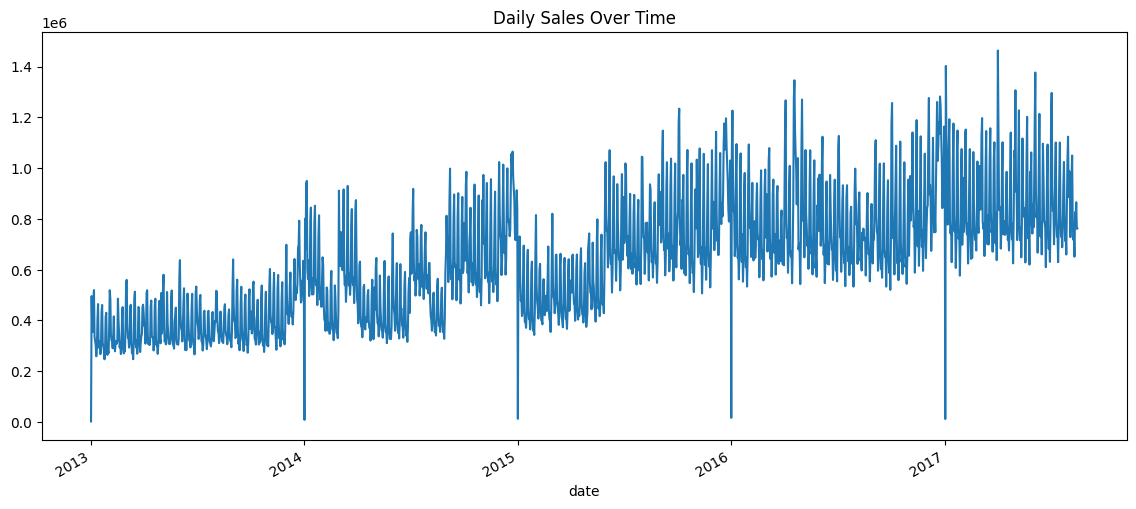

In [ ]:
#Overall Sales Over Time

daily_sales = train.groupby('date')['sales'].sum()
daily_sales.plot(figsize=(14,6), title="Daily Sales Over Time")


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='month'>

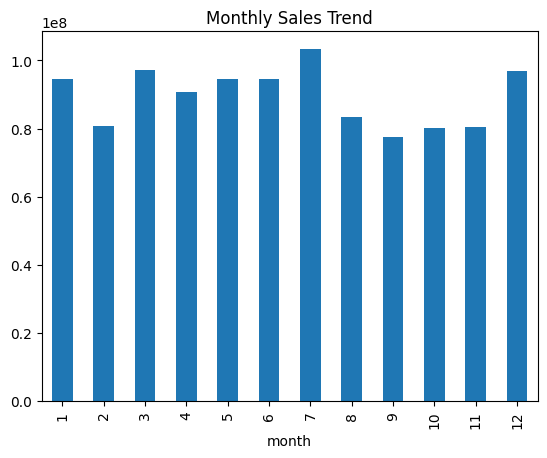

In [ ]:
#Monthly Sales Trend

monthly_sales = train.groupby('month')['sales'].sum()
monthly_sales.plot(kind='bar', title="Monthly Sales Trend")


<Axes: xlabel='dayofweek', ylabel='sales'>

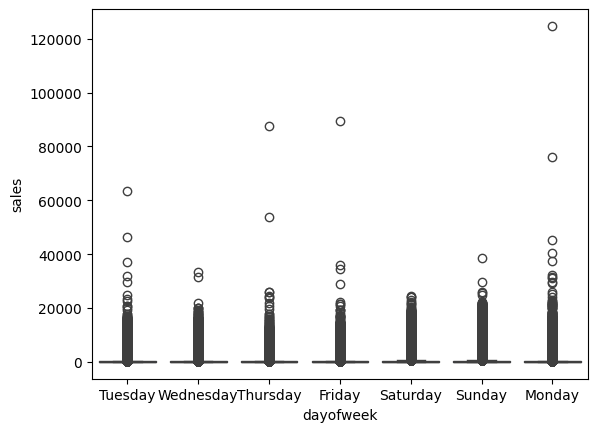

In [ ]:
#sns.boxplot(x='dayofweek', y='sales', data=train)

sns.boxplot(x='dayofweek', y='sales', data=train)


In [ ]:
# Merge sales + oil
df = train.merge(oil, on='date', how='left')

# Merge sales + transactions
df = df.merge(transactions, on=['date', 'store_nbr'], how='left')

# Mark holidays as 1/0
holidays_simple = holidays[['date']].copy()
holidays_simple['is_holiday'] = 1

df = df.merge(holidays_simple, on='date', how='left')
df['is_holiday'] = df['is_holiday'].fillna(0)


In [ ]:
corr_df = df[['sales', 'transactions', 'dcoilwtico', 'is_holiday']]


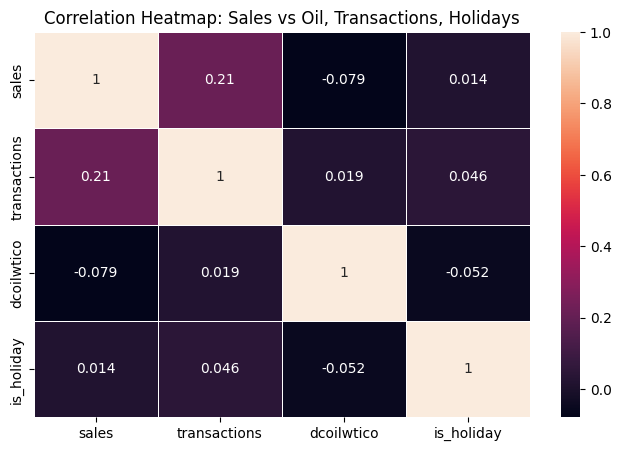

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(corr_df.corr(), annot=True, linewidths=0.5)
plt.title("Correlation Heatmap: Sales vs Oil, Transactions, Holidays")
plt.show()
